# Xác Suất và Mô Phỏng

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.stats import binom
from scipy.stats import poisson
from scipy.stats import norm

## 1. Biến ngẫu nhiên rời rạc

Giả sử X là biến ngẫu nhiên rời rạc

a. Hãy cho biết ý nghĩa câu lệnh sau: `binom.pmf(4, 10, 0.6)`

b. Giả sử X có phân phối nhị thức `X ~ B(10, 0.6)`. Hãy tính các giá trị sau:  
$P(X \leq 5), P(X \le 5), P(X \ge 4), P(X = 5) $

c. Hãy cho biết ý nghĩa câu lệnh sau: `poisson.pmf(4, 3)`

d. Giả sử X có phân phối Poisson `X ~ P(3)`. Hãy tính các giá trị sau:  
$P(X \leq 5), P(X \le 5), P(X \ge 4), P(X = 5) $

In [ ]:
# a. Hãy cho biết ý nghĩa câu lệnh sau: `binom.pmf(4, 10, 0.6)`
# Câu lệnh binom.pmf(4, 10, 0.6) có ý nghĩa là tính xác suất của biến ngẫu nhiên có phân phối nhị thức X ~ B(10, 0.6) nhận giá trị 4, n = 10, p = 0.6.
# Xác suất này được tính bằng hàm khối xác suất (probability mass function - pmf) của phân phối nhị thức.


# b. Giả sử X có phân phối nhị thức `X ~ B(10, 0.6)`. Hãy tính các giá trị sau:  
# P(X <= 5), P(X >= 5), P(X >= 4), P(X = 5) 
n = 10
p = 0.6
print(binom.cdf(5, n, p))
# P(X <= 5)

print("P(X <= 5)", binom.cdf(5, n, p))
# P(X >= 5) = 1 - P(X < 5) = 1 - P(X <= 4)
print("P(x >= 5)",1 - binom.cdf(5-1,n, p))
# P(X >= 4) = 1 - P(X < 4) = 1 - P(X <= 3) 
print("P(x >= 4)", 1 - binom.cdf(4-1,n, p))

# c. Hãy cho biết ý nghĩa câu lệnh sau: `poisson.pmf(4, 3)`
# Câu lệnh poisson.pmf(4, 3) có ý nghĩa là tính giá trị xác suất của phân phối Poisson
# Cho sự kiện xảy ra chính xác 4 lần trong một khoảng thời gian hoặc không gian cụ thể, khi giá trị kỳ vọng (mean) là 3.

# d. Giả sử X có phân phối Poisson `X ~ P(3)`. Hãy tính các giá trị sau:  
# $P(X \leq 5), P(X \le 5), P(X \ge 4), P(X = 5) $

0.3668967424000001
P(X <= 5) 0.3668967424000001
P(x >= 5) 0.8337613824
P(x >= 4) 0.9452381183999999


# 2. Tỷ lệ đậu

Một môn học X được tổ chức mỗi học kỳ có tỷ lệ thí sinh học qua môn trung bình là 80%, và mỗi học kỳ có 250 sinh viên đăng ký dự thi. Tính giá trị kỳ vọng và độ lệch chuẩn của số lượng thí sinh không vượt qua môn học?

In [ ]:
p = 0.2
n = 250
print("Giá trị kỳ vọng: ", n*p)
print("Phương sai: ", n*p*(1-p))

Giá trị kỳ vọng:  50.0
Phương sai:  40.0


## 3. Tổng đài

Một tổng đài trung bình trong một giờ nhận được 180 cuộc gọi một cách ngẫu nhiên. Nếu trong 5 phút có từ hơn 20 cuộc gọi trở lên, thì tổng đài sẽ quá tải và người gọi đến sẽ phải chờ đợi. Giả sử số cuộc gọi nhận được trong 5 phút của tổng đài có phân phối Poisson. Tính:

a. Xác suất nhận được nhiều hơn 19 cuộc gọi mỗi 5 phút.

b. Trong 5 phút tổng đài có thể nhận được nhiều nhất bao nhiêu cuộc gọi để xác suất các cuộc gọi đều được xử lý ít nhất là 99%

In [ ]:
import math

# Hàm tính xác suất theo phân phối Poisson
def poisson_probability(lam, k):
    return (lam ** k) * math.exp(-lam) / math.factorial(k)

# a. Xác suất nhận được nhiều hơn 19 cuộc gọi mỗi 5 phút
lam = 3  # lambda
probability = 1 - sum(poisson_probability(lam, k) for k in range(20))
print("a. Xác suất nhận được nhiều hơn 19 cuộc gọi mỗi 5 phút là:", probability)

# b. Tìm số cuộc gọi tối đa để xác suất không quá tải ít nhất 99%
lam = 3  # lambda
max_calls = 0
while True:
    probability = sum(poisson_probability(lam, k) for k in range(max_calls + 1))
    if probability >= 0.99:
        break
    max_calls += 1
print("b. Số cuộc gọi tối đa để xác suất không quá tải ít nhất 99% là:", max_calls)


a. Xác suất nhận được nhiều hơn 19 cuộc gọi mỗi 5 phút là: 8.314404720266566e-11
b. Số cuộc gọi tối đa để xác suất không quá tải ít nhất 99% là: 8


In [ ]:
k = 19
# Trung bình một giờ nhận được 180 cuộc gọi => mỗi phút thì nhận được 3 cuộc gọi
lamda = 180 / 60
#  nhiều hơn 19 cuộc gọi mỗi 5 phút P(X >= 19)
print("P(X >= 19): ", 1 - poisson.cdf(k, lamda))

# b. Trong 5 phút tổng đài có thể nhận được nhiều nhất bao nhiêu cuộc gọi để xác suất các cuộc gọi đều được xử lý ít nhất là 99%
print("Số cuộc gọi tối đa: ", poisson.ppf(0.99, lamda))

P(X >= 19):  8.314426924727059e-11
Số cuộc gọi tối đa:  8.0


## 4. Phân phối liên tục

a. Cho biết ý nghĩa của các câu lệnh sau:

- `norm.cdf(2)`

- `norm.cdf(2, 1, 1)`

- `norm.cdf(2, 1, 2)`

b. Cho biết kết quả của câu lệnh sau: `norm.ppf(norm.cdf(2))`

c. Tính các giá trị sau và vẽ hình minh họa cho các giá trị tính được:

- `norm.ppf(0.975)`

- `norm.ppf(0.975, 1, 1)`

- `norm.ppf(0.975, 1, 2)`

d. Giả sử biến ngẫu nhiên X có phân phối chuẩn với kỳ vọng là 24 và phương sai là 16. Hãy tính các giá trị sau:

- $P(X \leq 20)$
- $P(X \ge 29.5)$
- $P(X = 23.8)$

In [ ]:
#a 
# Ý nghĩa của câu lệnh norm.cdf(2)
# Câu lệnh norm.cdf(2) có ý nghĩa là  tính gia trị phân phối chuẩn tại giá trị x = 2

# Ý nghĩa của câu lệnh norm.cdf(2, 1, 1)
# Câu lệnh norm.cdf(2, 1, 1) có ý nghĩa là tính giá trị xác xuất phân phối chuẩn tại x = 2,  nguy = 1, std = 1

# Ý nghĩa của câu lệnh norm.cdf(2, 1, 2)
# Câu lệnh norm.cdf(2, 1, 2) có ý nghĩa là tính giá trị xác xuất phân phối chuẩn tại x = 2,  nguy = 1, std = 2

# b
print("Kết quả của norm.ppf(norm.cdf(2)) là: ", norm.ppf(norm.cdf(2)).round(2))

# c Tính các giá trị sau:
print("Kết quả norm.ppf(0.975): ", norm.ppf(0.975).round(4))
print("Kết quả norm.ppf(0.975,1 ,1): ", norm.ppf(0.975,1, 1).round(4))
print("Kết quả norm.ppf(0.975, 1, 2): ", norm.ppf(0.975, 1, 2).round(4))

# d
nguy = 24
std = 4
print("P(X <= 20): ", norm.cdf(20, nguy, std))
print("P(X >= 29.5): ", 1 - norm.cdf(29.5, nguy, std))
print("P(X = 23.9): ", norm.pmf(23.9, nguy, std))



Kết quả của norm.ppf(norm.cdf(2)) là:  2.0
Kết quả norm.ppf(0.975):  1.96
Kết quả norm.ppf(0.975,1 ,1):  2.96
Kết quả norm.ppf(0.975, 1, 2):  4.9199
P(X <= 20):  0.15865525393145707
P(X >= 29.5):  0.08456572235133564


AttributeError: 'norm_gen' object has no attribute 'pmf'

## 5. Độ dài chi tiết máy

Một công ty sản xuất làm ra các chi tiết máy với độ dài các chi tiết có phân phối chuẩn với kỳ vọng là 3000 mm và độ lệch chuẩn là 3 mm. Yêu cầu cho các chi tiết máy này là phải có chiều dài từ 2993 mm đến 3007 mm. Tính tỷ lệ sản phẩm lỗi của công ty

In [ ]:
nguy = 3000
std = 3

xs_2993 =  norm.cdf(2993, nguy, std)
xs_3007 = norm.cdf(3007, nguy, std)
print("2993 <= x <= 3007: ", xs_3007 - xs_2993)


2993 <= x <= 3007:  0.9803693427427094


## 6. Mô phỏng phân phối Chuẩn

Giả sử điểm thi TOEIC là một biến ngẫu nhiên có phân phối chuẩn với kỳ vọng là 500, độ lệch chuẩn là 8. Bạn hãy:

a. Mô phỏng bằng cách phát sinh ngẫu nhiên điểm thi TOIEC của một nhóm gồm 50 người.

b. Tính điểm trung bình và độ lệch chuẩn về điểm của nhóm.

c. Tìm miền giá trị, và miền phân vị (IQR) của nhóm

d. Cho biết tỷ lệ đạt trên 450 điểm của nhóm. 

e. Vẽ đồ thị histogram của nhóm và so sánh với đồ thị hàm mật độ của phân phối chuẩn với kỳ vọng là 500 và độ lệch chuẩn là 8.

f. Thay vì mô phỏng 50 người, hãy mô phỏng nhóm với 100 người thi. Bạn có nhận xét gì?

mean:  500.5900107314002
std:  7.644478321012541
Miiền giá trị:  41.330222619368215
Miền phân vị (IQR):  8.974594235298639
Xs đạt tỉ lệ trên 450:  0.9999999997947736


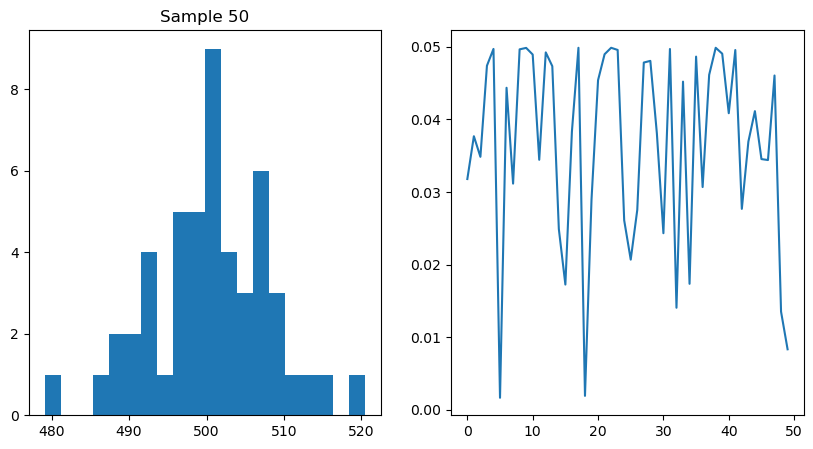

In [ ]:
nguy = 500
std = 8
# a
sample_50 = norm.rvs(nguy, std, 50)

# b
print("mean: ", np.mean(sample_50))
print("std: ", np.std(sample_50))

#c
print("Miiền giá trị: ", np.max(sample_50) - np.min(sample_50))
print("Miền phân vị (IQR): ", np.quantile(sample_50, 0.75) - np.quantile(sample_50, 0.25))

# d
print("Xs đạt tỉ lệ trên 450: ", 1 - norm.cdf(450, nguy, std))

# Ve do thi
fig, axe = plt.subplots(1, 2, figsize = (10, 5))
axe[0].hist(sample_50, bins = 20)
axe[0].set_title("Sample 50");

axe[1].plot(norm.pdf(sample_50, nguy, std));

Một phân xưởng có 5 máy hoạt động độc lập. Giả sử xác suất để mỗi máy bị hỏng trong mộ ngày đều bằng 0.1
Tính xác suất để trong ngày không có quá hai máy hỏng?

In [ ]:
p = 0.9
n = 5
print("P(x <= 2)", binom.cdf(2, n, p))

P(x <= 1) 0.008559999999999995


> Cho biến ngẫu nhiên X có phân phối chuẩn với kỳ vọng là 35, độ lệch chuẩn là 10. 
>
> Tính P(28 < X < 34) = ?

In [ ]:
print(norm.cdf(34, 35, 10) - norm.cdf(28, 35, 10))

0.21820851049989798


Cân nặng của những con tuần lộc đực có phân phối chuẩn với kỳ vọng là 102.4 (kg) và độ lệch chuẩn là 13.9 (kg).

Dunder là một con trong số con tuần lộc nhỏ của ông giá Noel. Giả sử rằng có chính xác 10% tổng số tuần lộc có cân nặng nhỏ hơn Dunder.

Hỏi Dunder có cân nặng bao nhiêu?

In [ ]:
norm.ppf(0.1, 102.4, 13.9)

84.58643323893006

Điểm một bài thi là biến ngẫu nhiên có phân phối chuẩn với kỳ vọng là 100 và độ lệch chuẩn là 20. 

Cho biết giá trị phân vị 25 của điểm là bao nhiêu?

In [ ]:
norm.ppf(0.25, 100,20)

86.51020499607837

Cho biến ngẫu nhiên X có phân phối chuẩn với kỳ vọng là 35, độ lệch chuẩn là 10. 

Tính P(X > 34) = ?


In [ ]:
1-norm.cdf(34,35,10)

0.539827837277029